In [ ]:
import pandas as pd
import numpy as np

In [31]:
data=pd.read_csv('/content/drive/MyDrive/Preprocessed_housing.csv')

In [32]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,7350000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,0.500000
1,7350000,7980,4,4,4,1,0,0,0,1,3,0,0,0,1995.0,1.000000
2,7350000,7980,3,2,2,1,0,1,0,0,2,1,1,0,2660.0,0.666667
3,7350000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,0.500000
4,7350000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,0.250000


In [33]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#scaler.fit(data)
#data1=scaler.transform(data)
data1=data.copy()

In [34]:
data1=data[['price','area','bedrooms','bathrooms','stories','parking','areaperbedroom','bbratio']]

In [35]:
#defining a normalisation function
def Standardize (x):
    return ( (x-np.mean(x))/ (np.std(x)))


# applying normalize ( ) to all columns
data1 = data1.apply(Standardize)
data1.head()

,price,area,bedrooms,bathrooms,stories,parking,areaperbedroom,bbratio
0,1.847644,1.446217,1.403419,1.421812,1.378217,1.517692,0.113487,0.336622
1,1.847644,1.784183,1.403419,5.405809,2.532024,2.679409,0.318767,3.474461
2,1.847644,1.784183,0.047278,1.421812,0.224410,1.517692,1.293849,1.382568
3,1.847644,1.494498,1.403419,1.421812,0.224410,2.679409,0.142813,0.336622
4,1.847644,1.446217,1.403419,-0.570187,0.224410,1.517692,0.113487,-1.232297


In [36]:
datanew=pd.concat([data[['mainroad','basement','hotwaterheating','guestroom','airconditioning','prefarea','semi-furnished','unfurnished']],data1],axis=1)
datanew.head()

,mainroad,basement,hotwaterheating,guestroom,airconditioning,prefarea,semi-furnished,unfurnished,price,area,bedrooms,bathrooms,stories,parking,areaperbedroom,bbratio
0,1,0,0,0,1,1,0,0,1.847644,1.446217,1.403419,1.421812,1.378217,1.517692,0.113487,0.336622
1,1,0,0,0,1,0,0,0,1.847644,1.784183,1.403419,5.405809,2.532024,2.679409,0.318767,3.474461
2,1,1,0,0,0,1,1,0,1.847644,1.784183,0.047278,1.421812,0.224410,1.517692,1.293849,1.382568
3,1,1,0,0,1,1,0,0,1.847644,1.494498,1.403419,1.421812,0.224410,2.679409,0.142813,0.336622
4,1,1,0,1,1,0,0,0,1.847644,1.446217,1.403419,-0.570187,0.224410,1.517692,0.113487,-1.232297


In [37]:
Y=datanew['price']
X=datanew.drop(['price'],axis=1)

In [38]:
X.tail()

,mainroad,basement,hotwaterheating,guestroom,airconditioning,prefarea,semi-furnished,unfurnished,area,bedrooms,bathrooms,stories,parking,areaperbedroom,bbratio
540,1,1,0,0,0,0,0,1,-1.221303,-1.308863,-0.570187,-0.929397,1.517692,-0.407045,0.336622
541,0,0,0,0,0,0,1,0,-1.221303,0.047278,-0.570187,-0.929397,-0.805741,-1.140189,-0.709324
542,1,0,0,0,0,0,0,1,-0.847126,-1.308863,-0.570187,-0.929397,-0.805741,0.047504,0.336622
543,0,0,0,0,0,0,0,0,-1.221303,0.047278,-0.570187,-0.929397,-0.805741,-1.140189,-0.709324
544,1,0,0,0,0,0,0,1,-0.708319,0.047278,-0.570187,0.224410,-0.805741,-0.724741,-0.709324


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=100)

In [40]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(436, 15)
(109, 15)
(436,)
(109,)


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
Lr=LinearRegression()
model=Lr.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
r2_Score=r2_score(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)

In [42]:
r2_Score

0.7121167732105802

In [43]:
mse


0.29688513183083975

In [44]:
Lr.intercept_


-0.5225243338372071

In [45]:
coeff_df = pd.DataFrame(Lr.coef_,X_test.columns.values,columns=['coeff_df'])


In [46]:
coeff_df


,coeff_df
mainroad,0.346133
basement,0.170775
hotwaterheating,0.486600
guestroom,0.203003
airconditioning,0.463959
prefarea,0.289770
semi-furnished,-0.041934
unfurnished,-0.252288
area,0.380376
bedrooms,-0.063076


In [47]:
#building model using stats model
#calculating the p-value using the stats model
import statsmodels.api as sm
X_sm=sm.add_constant(X_train)
Xt_sm=sm.add_constant(X_test)
model=sm.OLS(Y_train,X_sm).fit()
Y_pred=model.predict(Xt_sm)
r2_Score=r2_score(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
print(r2_Score)
print(mse)
model.summary()

0.7121167732105804
0.29688513183083953


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     65.22
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           1.50e-99
Time:                        23:58:21   Log-Likelihood:                -354.58
No. Observations:                 436   AIC:                             741.2
Df Residuals:                     420   BIC:                             806.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5225      0.098     -5.358      0.000      -0.714      -0.331
mainroad            0.3461      0.084      4.110      0.000       0.181       0.512
basement            0.1708      0.064      2.659      0.008       0.045       0.297
hotwaterheating     0.4866      0.120      4.052      0.000       0.251       0.723
guestroom           0.2030      0.079      2.559      0.011       0.047       0.359
airconditioning     0.4640      0.064      7.225      0.000       0.338       0.590
prefarea            0.2898      0.068      4.273      0.000       0.156       0.423
semi-furnished     -0.0419      0.068     -0.615      0.539      -0.176       0.092
unfurnished        -0.2523      0.073     -3.469      0.001      -0.395      -0.109
area                0.3804      0.102      3.723      0.000       0.180       0.581
bedrooms           -0.0631      0.083     -0.761      0.447      -0.226       0.100
bathrooms           0.3099      0.124      2.505      0.013       0.067       0.553
stories             0.2115      0.032      6.513      0.000       0.148       0.275
parking             0.0665      0.029      2.258      0.024       0.009       0.124
areaperbedroom     -0.0967      0.110     -0.877      0.381      -0.313       0.120
bbratio            -0.0419      0.120     -0.348      0.728      -0.278       0.195
==============================================================================
Omnibus:                        8.422   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                9.986
Skew:                           0.218   Prob(JB):                      0.00678
Kurtosis:                       3.600   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
#checking for the multicollinearity using VIF
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [49]:
# Calculating Vif value|
vif_cal(input_data=data1, dependent_col="price")

,Var,Vif
2,bathrooms,20.81
6,bbratio,19.70
5,areaperbedroom,17.10
0,area,13.99
1,bedrooms,9.29
3,stories,1.30
4,parking,1.19


In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['features']=X.columns
vif.sort_values(by = 'VIF', axis=0, ascending=False, inplace=False)

,VIF,features
10,21.250530,bathrooms
14,20.272219,bbratio
13,17.816124,areaperbedroom
8,14.966888,area
9,9.436436,bedrooms
0,3.737604,mainroad
6,2.039716,semi-furnished
1,2.010895,basement
7,1.791073,unfurnished
4,1.676610,airconditioning


<Axes: >

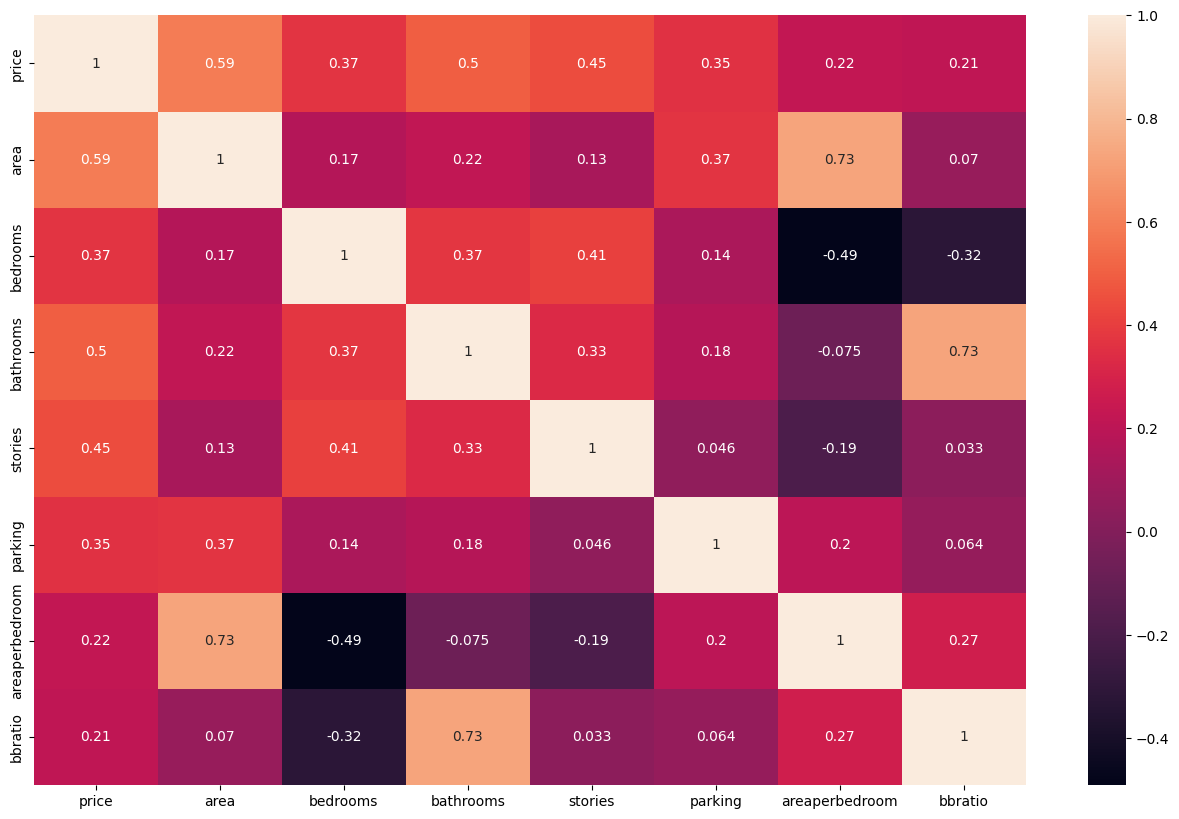

In [51]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Let's see the correlation matrix
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(data1.corr(),annot = True)

In [52]:
#dropping the highly co-related features
X_sm = X_sm.drop(['bbratio', 'areaperbedroom'],1)
Xt_sm = Xt_sm.drop(['bbratio', 'areaperbedroom'],1)

<ipython-input-52-129894f783a4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_sm = X_sm.drop(['bbratio', 'areaperbedroom'],1)
<ipython-input-52-129894f783a4>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Xt_sm = Xt_sm.drop(['bbratio', 'areaperbedroom'],1)


In [53]:
model=sm.OLS(Y_train,X_sm).fit()
#Y_pred=model.predict(Xt_sm)
#r2_Score=r2_score(Y_test,Y_pred)
#mse=mean_squared_error(Y_test,Y_pred)
#print(r2_Score)
#print(mse)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     75.20
Date:                Thu, 07 Mar 2024   Prob (F-statistic):          4.42e-101
Time:                        23:58:52   Log-Likelihood:                -355.42
No. Observations:                 436   AIC:                             738.8
Df Residuals:                     422   BIC:                             795.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5329      0.097     -5.489      0.000      -0.724      -0.342
mainroad            0.3465      0.084      4.117      0.000       0.181       0.512
basement            0.1728      0.064      2.698      0.007       0.047       0.299
hotwaterheating     0.4886      0.120      4.079      0.000       0.253       0.724
guestroom           0.2106      0.078      2.687      0.007       0.057       0.365
airconditioning     0.4658      0.064      7.260      0.000       0.340       0.592
prefarea            0.3003      0.067      4.464      0.000       0.168       0.433
semi-furnished     -0.0354      0.068     -0.521      0.603      -0.169       0.098
unfurnished        -0.2474      0.073     -3.409      0.001      -0.390      -0.105
area                0.2966      0.032      9.383      0.000       0.234       0.359
bedrooms            0.0258      0.032      0.815      0.415      -0.036       0.088
bathrooms           0.2683      0.030      8.830      0.000       0.209       0.328
stories             0.2171      0.032      6.803      0.000       0.154       0.280
parking             0.0690      0.029      2.352      0.019       0.011       0.127
==============================================================================
Omnibus:                        8.471   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                9.905
Skew:                           0.224   Prob(JB):                      0.00707
Kurtosis:                       3.586   Cond. No.                         7.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
X_new=X.drop(['bbratio', 'areaperbedroom'],1)
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X_new.values,i) for i in range(X_new.shape[1])]
vif['features']=X_new.columns
vif.sort_values(by = 'VIF', axis=0, ascending=False, inplace=False)

<ipython-input-54-befab952c101>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_new=X.drop(['bbratio', 'areaperbedroom'],1)


,VIF,features
0,3.708342,mainroad
6,2.037732,semi-furnished
1,1.994540,basement
7,1.790631,unfurnished
4,1.676449,airconditioning
5,1.514511,prefarea
3,1.490480,guestroom
11,1.461109,stories
8,1.368016,area
9,1.362254,bedrooms


In [55]:
#dropping the highly co-related features
X_sm = X_sm.drop(['bedrooms'],1)
Xt_sm = Xt_sm.drop(['bedrooms'],1)

<ipython-input-55-67ba033b565f>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_sm = X_sm.drop(['bedrooms'],1)
<ipython-input-55-67ba033b565f>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Xt_sm = Xt_sm.drop(['bedrooms'],1)


In [56]:
model=sm.OLS(Y_train,X_sm).fit()
Y_pred=model.predict(Xt_sm)
r2_Score=r2_score(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
print(r2_Score)
print(mse)
model.summary()

0.7095886596726257
0.2994922976923922


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     81.47
Date:                Thu, 07 Mar 2024   Prob (F-statistic):          6.65e-102
Time:                        23:58:56   Log-Likelihood:                -355.76
No. Observations:                 436   AIC:                             737.5
Df Residuals:                     423   BIC:                             790.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5300      0.097     -5.465      0.000      -0.721      -0.339
mainroad            0.3400      0.084      4.060      0.000       0.175       0.505
basement            0.1807      0.063      2.856      0.004       0.056       0.305
hotwaterheating     0.4904      0.120      4.096      0.000       0.255       0.726
guestroom           0.2090      0.078      2.669      0.008       0.055       0.363
airconditioning     0.4638      0.064      7.237      0.000       0.338       0.590
prefarea            0.2992      0.067      4.450      0.000       0.167       0.431
semi-furnished     -0.0346      0.068     -0.509      0.611      -0.168       0.099
unfurnished        -0.2487      0.073     -3.429      0.001      -0.391      -0.106
area                0.2981      0.032      9.450      0.000       0.236       0.360
bathrooms           0.2742      0.030      9.293      0.000       0.216       0.332
stories             0.2265      0.030      7.620      0.000       0.168       0.285
parking             0.0712      0.029      2.437      0.015       0.014       0.129
==============================================================================
Omnibus:                        9.002   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               10.570
Skew:                           0.236   Prob(JB):                      0.00507
Kurtosis:                       3.600   Cond. No.                         7.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
X_new=X.drop(['bbratio', 'areaperbedroom','bedrooms'],1)
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X_new.values,i) for i in range(X_new.shape[1])]
vif['features']=X_new.columns
vif.sort_values(by = 'VIF', axis=0, ascending=False, inplace=False)

<ipython-input-57-bd31c7a29bd6>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_new=X.drop(['bbratio', 'areaperbedroom','bedrooms'],1)


,VIF,features
0,3.663201,mainroad
6,2.032629,semi-furnished
1,1.951363,basement
7,1.790629,unfurnished
4,1.676412,airconditioning
5,1.513709,prefarea
3,1.489726,guestroom
8,1.363140,area
10,1.286537,stories
9,1.221801,bathrooms


In [58]:
#dropping the highly co-related features
X_sm = X_sm.drop(['semi-furnished'],1)
Xt_sm = Xt_sm.drop(['semi-furnished'],1)

<ipython-input-58-c0ed2669e3b3>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_sm = X_sm.drop(['semi-furnished'],1)
<ipython-input-58-c0ed2669e3b3>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Xt_sm = Xt_sm.drop(['semi-furnished'],1)


In [59]:
model=sm.OLS(Y_train,X_sm).fit()
Y_pred=model.predict(Xt_sm)
r2_Score=r2_score(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
print(r2_Score)
print(mse)
model.summary()

0.7112400269431041
0.29778929333446297


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     89.01
Date:                Thu, 07 Mar 2024   Prob (F-statistic):          7.82e-103
Time:                        23:59:44   Log-Likelihood:                -355.89
No. Observations:                 436   AIC:                             735.8
Df Residuals:                     424   BIC:                             784.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5538      0.085     -6.518      0.000      -0.721      -0.387
mainroad            0.3415      0.084      4.084      0.000       0.177       0.506
basement            0.1804      0.063      2.854      0.005       0.056       0.305
hotwaterheating     0.4888      0.120      4.088      0.000       0.254       0.724
guestroom           0.2093      0.078      2.675      0.008       0.055       0.363
airconditioning     0.4671      0.064      7.332      0.000       0.342       0.592
prefarea            0.2997      0.067      4.462      0.000       0.168       0.432
unfurnished        -0.2266      0.058     -3.897      0.000      -0.341      -0.112
area                0.2994      0.031      9.533      0.000       0.238       0.361
bathrooms           0.2743      0.029      9.305      0.000       0.216       0.332
stories             0.2268      0.030      7.637      0.000       0.168       0.285
parking             0.0711      0.029      2.438      0.015       0.014       0.128
==============================================================================
Omnibus:                        8.779   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.012   Jarque-Bera (JB):               10.242
Skew:                           0.233   Prob(JB):                      0.00597
Kurtosis:                       3.589   Cond. No.                         7.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
X_new=X.drop(['bbratio', 'areaperbedroom','bedrooms','semi-furnished'],1)
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X_new.values,i) for i in range(X_new.shape[1])]
vif['features']=X_new.columns
vif.sort_values(by = 'VIF', axis=0, ascending=False, inplace=False)

<ipython-input-60-1b21977321e9>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_new=X.drop(['bbratio', 'areaperbedroom','bedrooms','semi-furnished'],1)


,VIF,features
0,2.507401,mainroad
1,1.935221,basement
4,1.673195,airconditioning
5,1.513483,prefarea
3,1.489638,guestroom
6,1.418405,unfurnished
7,1.333804,area
9,1.282319,stories
8,1.221792,bathrooms
10,1.210516,parking


In [61]:
#checking important features using the RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [65]:
Lr=LinearRegression()
rfe = RFE(estimator=Lr, n_features_to_select=10)
rfe = rfe.fit(X_train, Y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)

[ True  True  True  True  True  True False  True  True False  True  True
 False False False]
[1 1 1 1 1 1 5 1 1 4 1 1 2 3 6]


In [66]:
col = X_train.columns[rfe.support_]
col

Index(['mainroad', 'basement', 'hotwaterheating', 'guestroom',
       'airconditioning', 'prefarea', 'unfurnished', 'area', 'bathrooms',
       'stories'],
      dtype='object')

Text(0, 0.5, 'Housing Price')

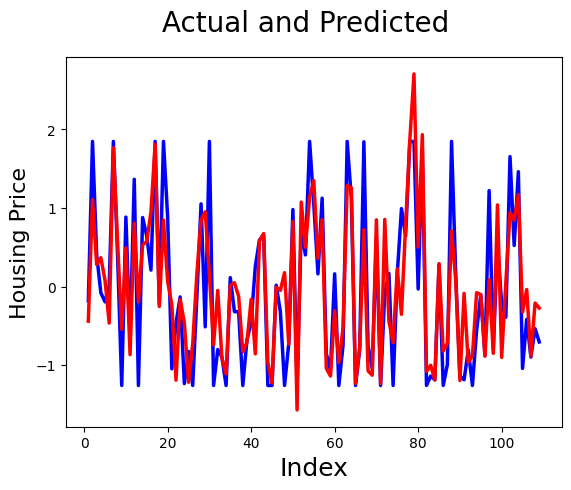

In [67]:
# Actual vs Predicted
c = [i for i in range(1,110,1)]
fig = plt.figure()
plt.plot(c,Y_test, color="blue", linewidth=2.5, linestyle="-")     #Plotting Actual
plt.plot(c,Y_pred, color="red",  linewidth=2.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Housing Price', fontsize=16)

Text(0, 0.5, 'y_pred')

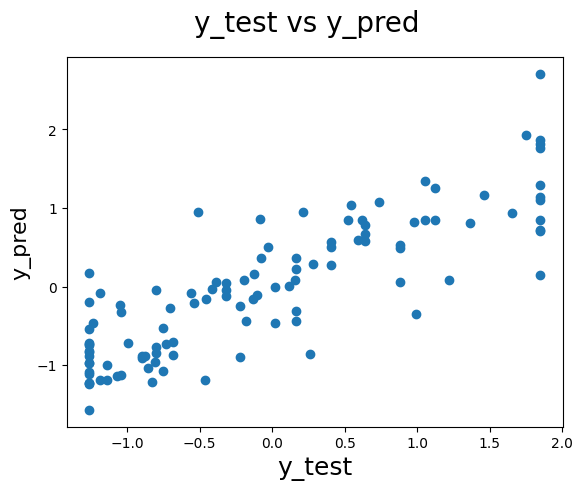

In [68]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(Y_test,Y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)


Text(0, 0.5, 'ytest-ypred')

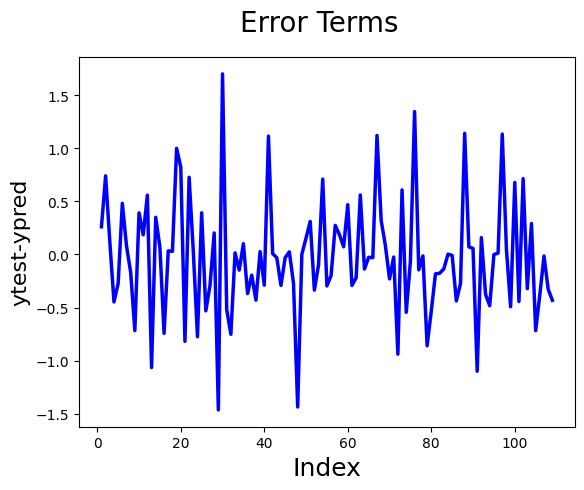

In [69]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,110,1)]
plt.plot(c,Y_test-Y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

the final model is the 71.12 test accuracy


<ipython-input-70-8d55800c6ba9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((Y_test-Y_pred),bins=50)


Text(0, 0.5, 'Index')

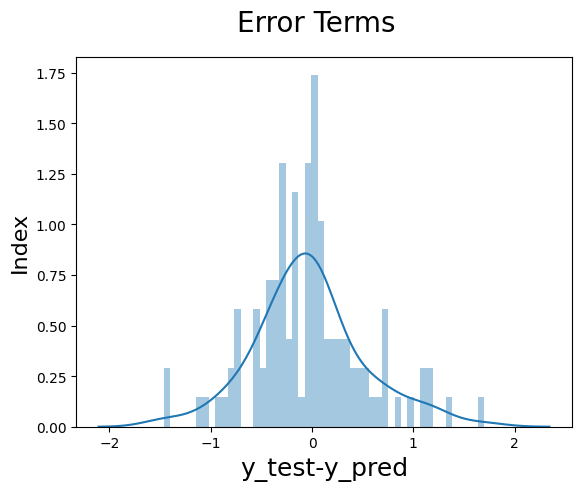

In [70]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((Y_test-Y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

In [71]:
print('RMSE :', np.sqrt(mse))

RMSE : 0.5457007360582016
